In [ ]:
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from verstack import NaNImputer
# from functools import partial

# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import FunctionTransformer

# from sklearn.model_selection import train_test_split

c:\Users\bokr4002\OneDrive - NIQ\Desktop\GitReposLocal\Are-You-Not-Entertained\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Directory config to project root to insure consistency across environments for project specific imports
from pyprojroot import here
os.chdir(here())

# Project specific imports
from src.utils import save_dataframe


In [ ]:
# Load dataset
data = pd.read_csv("./data/1.1_imputed_data_full.csv")

In [6]:
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   metascore                       8991 non-null   float64
 1   rotten_tomatoes_rating          8991 non-null   float64
 2   meta_critic_rating              8991 non-null   float64
 3   budget                          8991 non-null   float64
 4   revenue                         8991 non-null   float64
 5   metascore_missing               8991 non-null   int64  
 6   rotten_tomatoes_rating_missing  8991 non-null   int64  
 7   meta_critic_rating_missing      8991 non-null   int64  
 8   budget_missing                  8991 non-null   int64  
 9   revenue_missing                 8991 non-null   int64  
 10  total_wins                      8991 non-null   int64  
 11  total_noms                      8991 non-null   int64  
 12  oscar_wins                      89

,metascore,rotten_tomatoes_rating,meta_critic_rating,budget,revenue,metascore_missing,rotten_tomatoes_rating_missing,meta_critic_rating_missing,budget_missing,revenue_missing,...,release_day,is_weekend,is_holiday_season,movie_age,imdb_rating,imdb_votes,tmdb_vote_count,tmdb_vote_average,runtime_in_min,tmdb_popularity
count,8991.000000,8991.000000,8991.000000,8.991000e+03,8.991000e+03,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,...,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8.991000e+03,8991.000000,8991.000000,8991.000000,8991.000000
mean,46.298073,58.481968,46.300142,2.949312e+07,7.640777e+07,0.222445,0.135469,0.222445,0.312090,0.251362,...,15.634635,0.473473,0.337226,15.657991,6.420571,1.007544e+05,2054.957402,6.570768,105.176989,24.198829
std,24.367162,26.671324,24.364835,3.923949e+07,1.643700e+08,0.415911,0.342243,0.415911,0.463372,0.433821,...,8.541118,0.499324,0.472789,10.042885,0.973653,1.855595e+05,3245.049373,0.775399,21.755601,61.869253
min,1.000000,0.000000,1.000000,1.000000e+00,-5.499506e+07,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.600000,5.000000e+00,300.000000,2.200000,2.000000,0.017000
25%,25.000000,37.001306,25.000000,8.300000e+06,6.377621e+06,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,0.000000,0.000000,8.000000,5.800000,1.725250e+04,470.000000,6.086500,93.000000,10.626000
50%,49.000000,62.000000,49.000000,1.500000e+07,1.931725e+07,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.000000,0.000000,0.000000,14.000000,6.500000,3.929100e+04,876.000000,6.600000,103.000000,15.190000
75%,66.000000,82.000000,66.000000,3.250000e+07,7.158305e+07,0.000000,0.000000,0.000000,1.000000,1.000000,...,23.000000,1.000000,1.000000,22.000000,7.100000,1.018375e+05,2058.000000,7.100000,116.000000,24.177500
max,100.000000,100.000000,100.000000,4.600000e+08,2.923706e+09,1.000000,1.000000,1.000000,1.000000,1.000000,...,31.000000,1.000000,1.000000,41.000000,9.300000,2.995055e+06,37048.000000,8.800000,367.000000,2889.208000


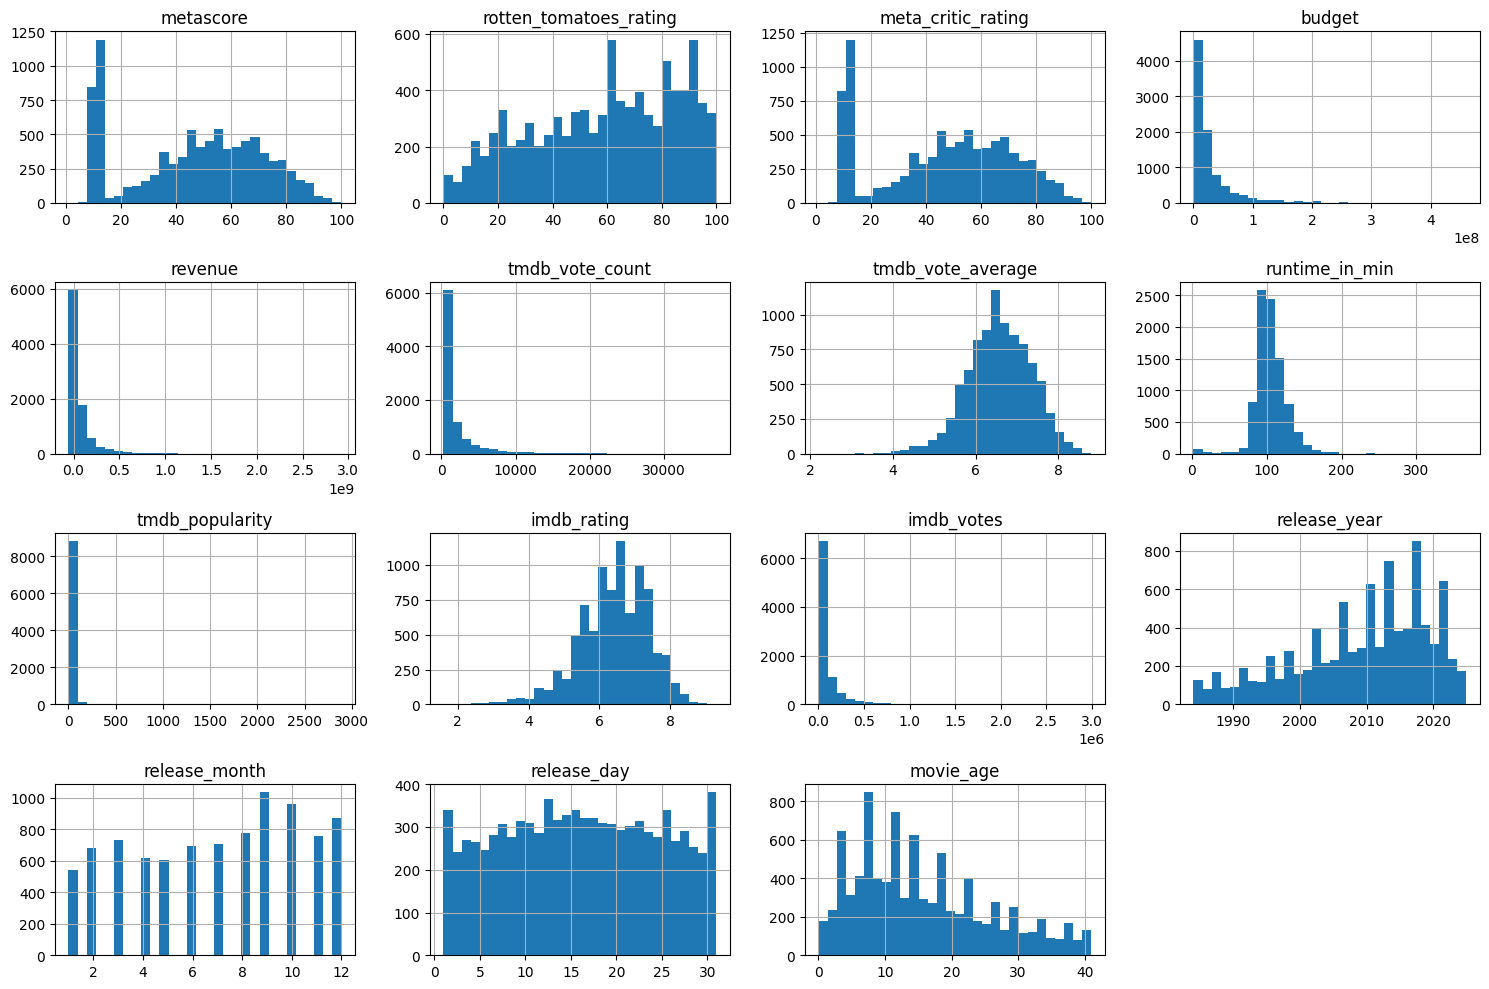

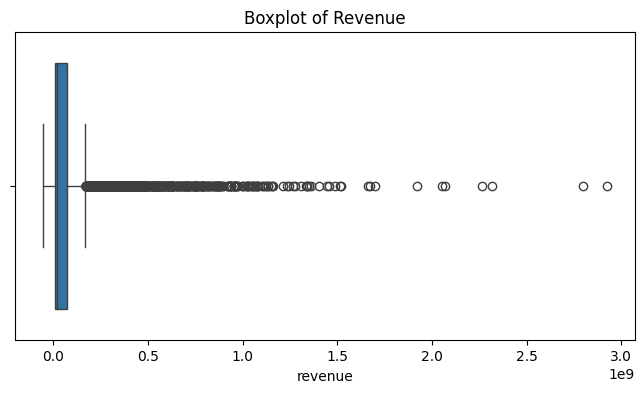

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['metascore', 'rotten_tomatoes_rating', 'meta_critic_rating', 'budget', 'revenue',
                'tmdb_vote_count', 'tmdb_vote_average', 'runtime_in_min', 'tmdb_popularity', 
                'imdb_rating', 'imdb_votes', 'release_year', 'release_month', 'release_day', 'movie_age']

# numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

data[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplot for revenue as an example
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['revenue'])
plt.title("Boxplot of Revenue")
plt.show()


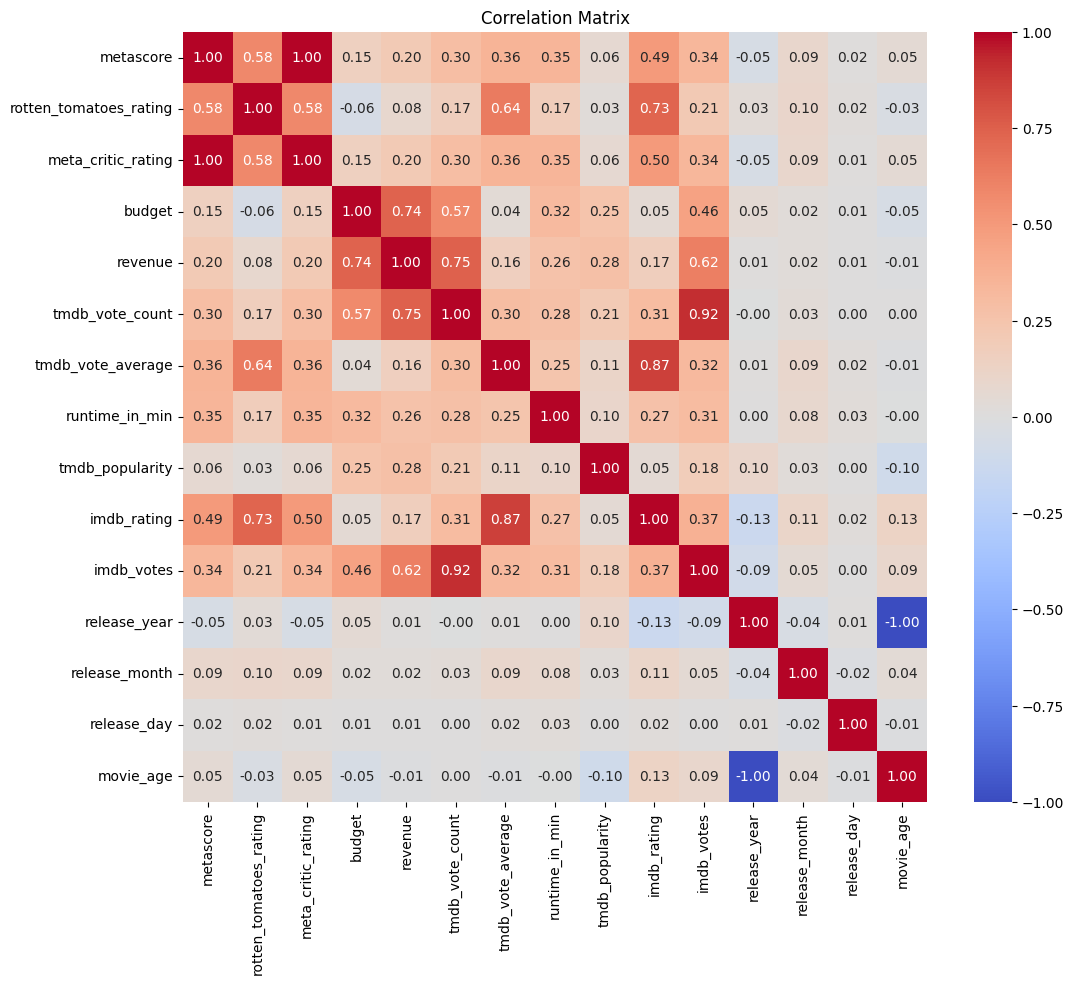

In [9]:
corr_matrix = data[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


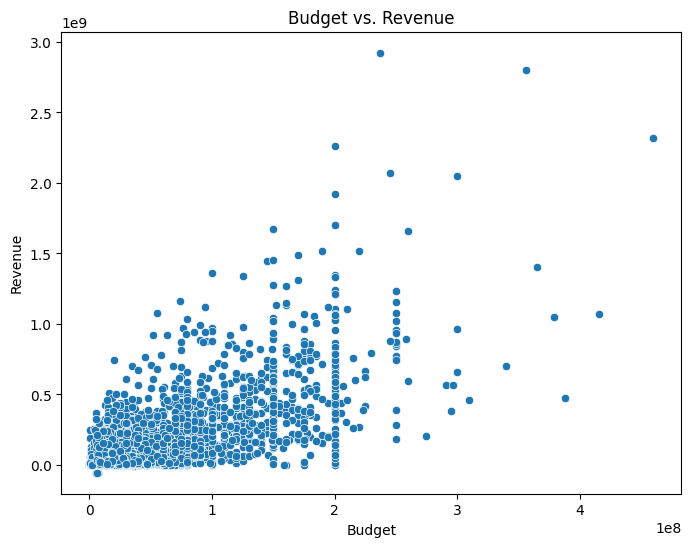

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['budget'], y=data['revenue'])
plt.title("Budget vs. Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()


In [11]:
cat_cols = ['production_country_name', 'spoken_languages', 'age_rating']
for col in cat_cols:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("-" * 50)


Value counts for production_country_name:
production_country_name
United States of America                                                4432
Others                                                                  1011
Others,United States of America                                          509
United Kingdom,United States of America                                  424
France                                                                   320
                                                                        ... 
Canada,France,Germany,Others,United Kingdom,United States of America       1
Canada,France,United Kingdom,United States of America                      1
United States of America,Others,Canada                                     1
United Kingdom,Canada                                                      1
United Kingdom,Germany,France                                              1
Name: count, Length: 170, dtype: int64
------------------------------------------------

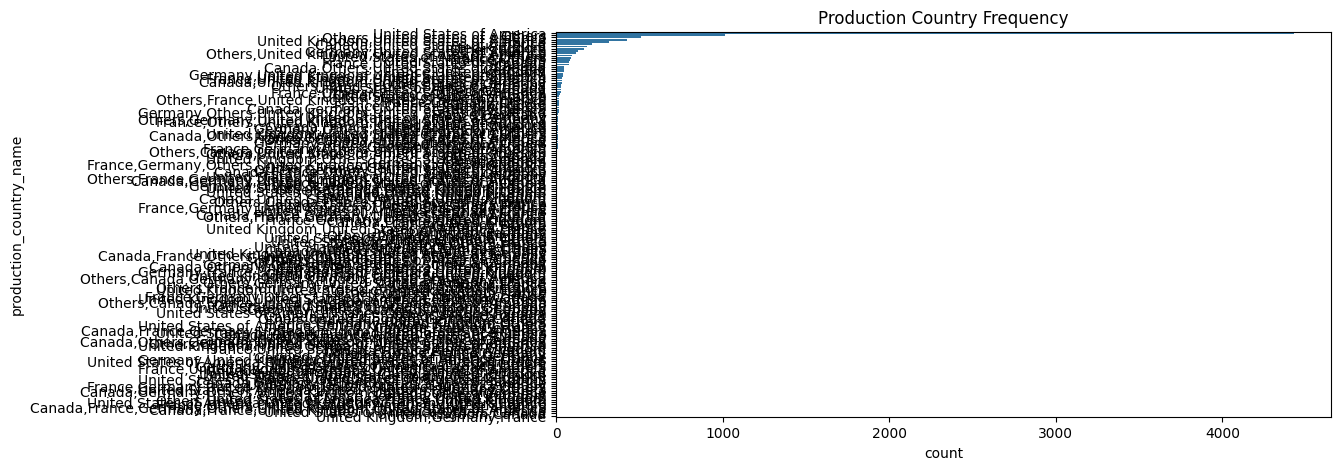

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(y=data['production_country_name'], order=data['production_country_name'].value_counts().index)
plt.title("Production Country Frequency")
plt.show()


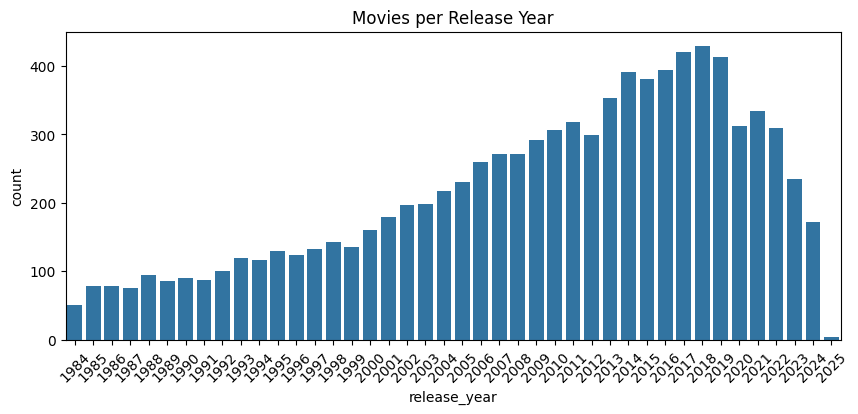

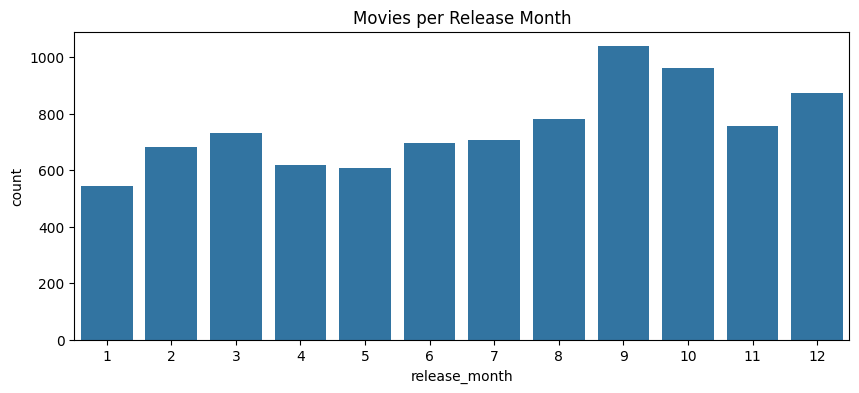

In [18]:
plt.figure(figsize=(10, 4))
sns.countplot(x=data['release_year'])
plt.title("Movies per Release Year")
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(x=data['release_month'])
plt.title("Movies per Release Month")
plt.show()


In [14]:
print(data['is_weekend'].value_counts(normalize=True))
print(data['is_holiday_season'].value_counts(normalize=True))


is_weekend
0    0.526527
1    0.473473
Name: proportion, dtype: float64
is_holiday_season
0    0.662774
1    0.337226
Name: proportion, dtype: float64


In [16]:
# Explode the genre column for analysis
genres = data['genre_names'].dropna().str.split(r',\s*').explode()
print(genres.value_counts())


genre_names
Drama              3927
Comedy             3289
Thriller           2472
Action             2167
Adventure          1506
Romance            1481
Crime              1366
Horror             1315
Science Fiction    1118
Family             1061
Fantasy            1049
Animation           852
Mystery             827
History             423
Music               250
War                 243
Documentary         135
TV Movie            111
Western              95
Missing_data          1
Name: count, dtype: int64


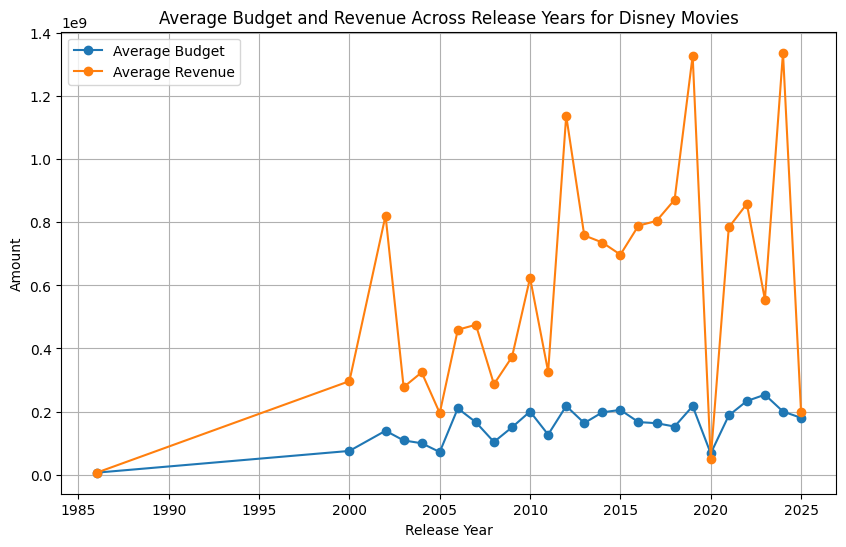

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for Disney movies (assuming "Disney" appears in the production_company_name)
disney_data = data[data["production_company_name"].str.contains("Marvel", case=False, na=False)]

# Further filter for rows where budget_missing is 0
disney_data = disney_data[((disney_data["budget_missing"] == 0) & (disney_data["revenue_missing"] == 0))]

# Group by release_year and compute the average budget and revenue
budget_revenue_by_year = disney_data.groupby("release_year")[["budget", "revenue"]].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(budget_revenue_by_year["release_year"], budget_revenue_by_year["budget"], marker="o", linestyle="-", label="Average Budget")
# plt.plot(budget_revenue_by_year["release_year"], budget_revenue_by_year["revenue"], marker="o", linestyle="-", label="Average Revenue")
plt.xlabel("Release Year")
plt.ylabel("Amount")
plt.title("Average Budget and Revenue Across Release Years for Disney Movies")
plt.legend()
plt.grid(True)
plt.show()

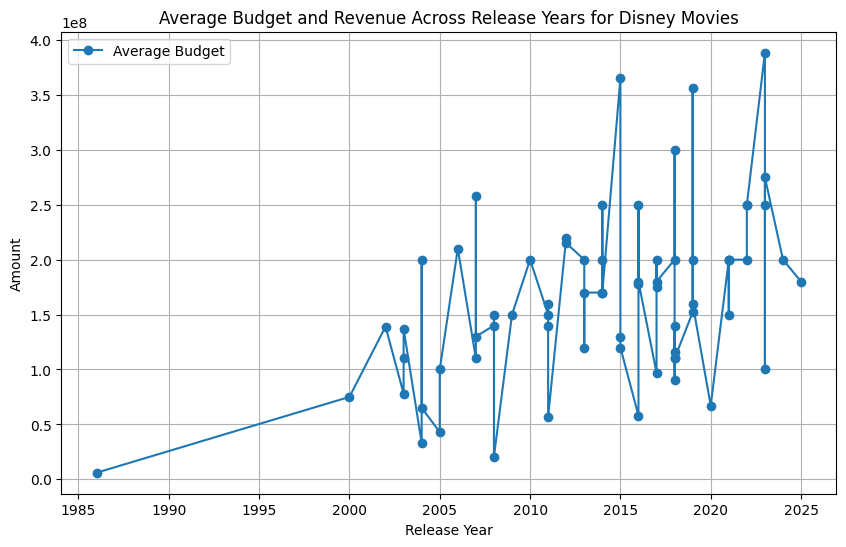

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for Disney movies (assuming "Disney" appears in the production_company_name)
company_data = data[data["production_company_name"].str.contains("Marvel", case=False, na=False)]

# Further filter for rows where budget_missing is 0
company_data = company_data[((company_data["budget_missing"] == 0) & (company_data["revenue_missing"] == 0))]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(company_data["release_year"], company_data["budget"], marker="o", linestyle="-", label="Average Budget")
# plt.plot(company_data["release_year"], company_data["revenue"], marker="o", linestyle="-", label="Average Revenue")
plt.xlabel("Release Year")
plt.ylabel("Amount")
plt.title("Average Budget and Revenue Across Release Years for Disney Movies")
plt.legend()
plt.grid(True)
plt.show()